In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser

In [5]:
lc_i = likelihood_analyser.LikelihoodAnalyser()

### Load data

In [8]:
foldername = r'/data/new_trap/20191104/Bead1/DMdata/'
bdf_DMdata = load_dir(foldername)
foldername = r'/data/new_trap/20191104/Bead1/DMdata2/'
bdf_DMdata2 = load_dir(foldername)

30  files in folder
30  files loaded
30  files in folder
30  files loaded


In [9]:
foldername = r'/data/new_trap/20191104/Bead1/Discharge4/'
bdf_discharge2 = load_dir(foldername)

103  files in folder
103  files loaded


<IPython.core.display.Javascript object>


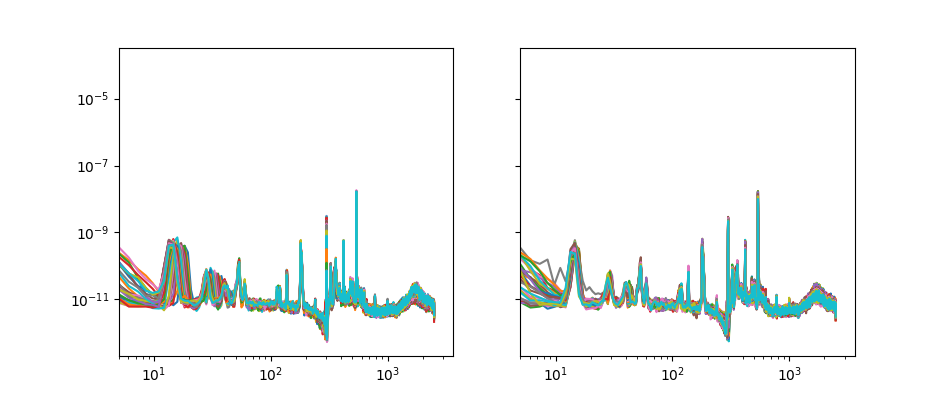

[(5, 3660.214239864062)]

In [10]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True, sharey=True)
[ax[0].loglog(*bb.welch_psd('x')) for bb in bdf_DMdata]
ax[0].set(xlim=(5,None))
[ax[1].loglog(*bb.welch_psd('x')) for bb in bdf_DMdata2]
ax[1].set(xlim=(5,None))

In [11]:
freq = bdf_discharge2[3].welch_psd('x')[0]
psds = [bb.welch_psd('x')[1] for bb in bdf_discharge2[3:]]

<IPython.core.display.Javascript object>


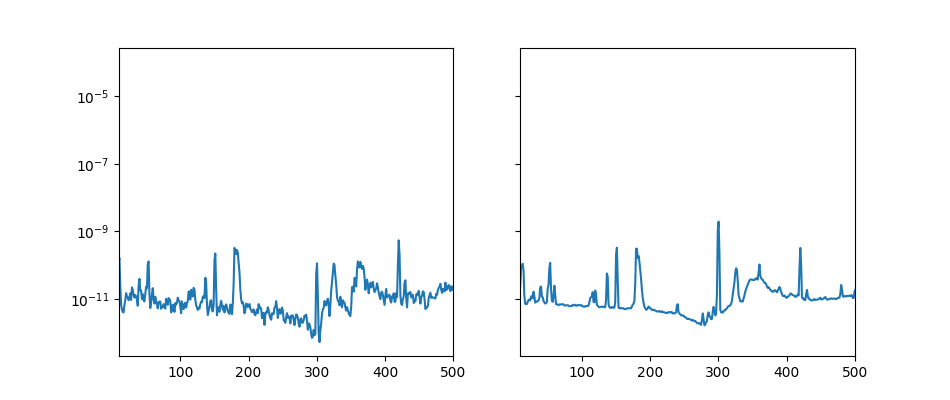

[(10, 500)]

In [12]:
bdf_sum = np.mean(psds, axis=0)
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True, sharey=True)
ax[0].semilogy(*bdf_discharge2[3].welch_psd('x'))
ax[1].semilogy(freq,bdf_sum)
ax[0].set(xlim=(10,500))

In [35]:
filename = r'/home/data_transfer/data_from_windows/20191107/Bead1/DMdata/Discharge_180.h5'
filename = r'/home/data_transfer/data_from_windows/20191107/Bead1/DMdata2/Discharge_117.h5'
# filename = r'/home/data_transfer/data_from_windows/20191112/Bead1/Discharge/Discharge_86.h5'
bb = BeadDataFile.BeadDataFile(filename)
xx = bb.response_at_freq2('x',151, bandwidth=10)*50000
analytic_signal = signal.hilbert(xx)
amplitude_envelope = np.abs(analytic_signal)

xx3 = bb.response_at_freq3('x',151, bandwidth=10)/6
analytic_signal3 = signal.hilbert(xx3)
amplitude_envelope3 = np.abs(analytic_signal3)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


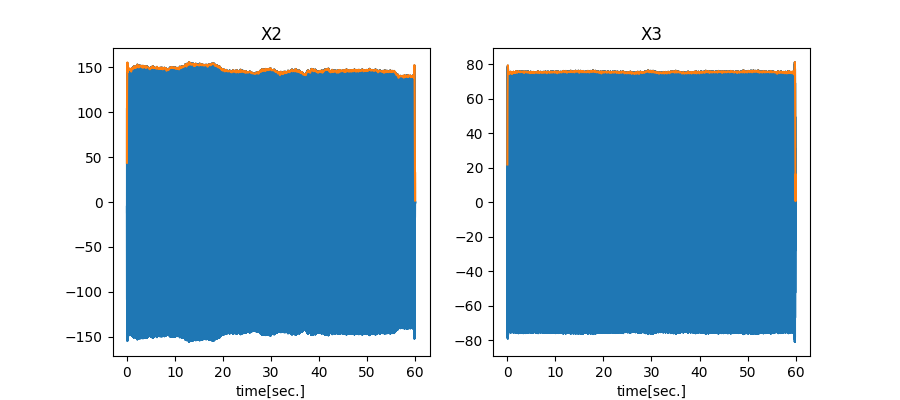

[Text(0.5, 0, 'time[sec.]'), Text(0.5, 1.0, 'X3')]

In [36]:
_,ax = plt.subplots(1,2,figsize=(9,4))
t = np.arange(300000)/5000
ax[0].plot(t, xx, label='signal')
ax[0].plot(t, amplitude_envelope, label='envelope')
ax[0].set(xlabel='time[sec.]', title='X2')

ax[1].plot(t, xx3, label='signal')
ax[1].plot(t, amplitude_envelope3, label='envelope')
ax[1].set(xlabel='time[sec.]', title='X3')

In [37]:
t_sub = t[5000:-5000]
average = np.mean(amplitude_envelope3[5000:-5000])
std = np.std(amplitude_envelope3[5000:-5000])
envelope3_subtracted = amplitude_envelope3-average
envelope3_subtracted = envelope3_subtracted[5000:-5000]

In [38]:
np.mean(t_sub.reshape(-1,100),axis=1)
np.mean(np.std(envelope3_subtracted.reshape(-1,100),axis=1))

0.01937277163425489

<IPython.core.display.Javascript object>


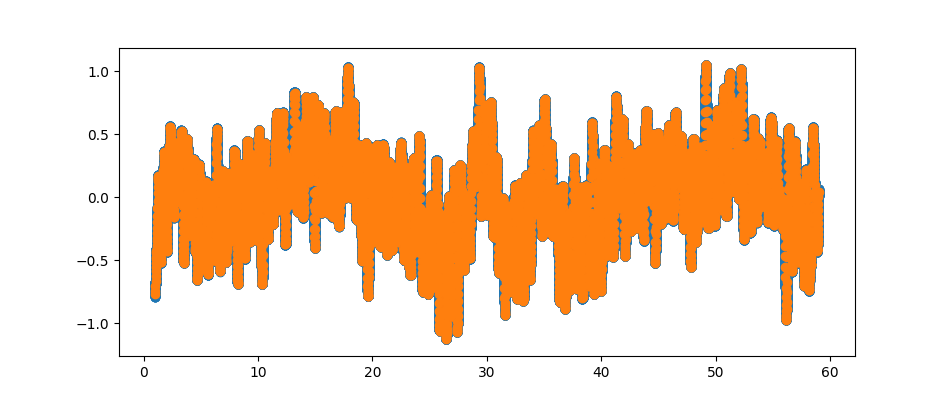

average:  75.52527713882822
std:  0.38321702505811933


In [42]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(t_sub, envelope3_subtracted)
print('average: ', average)
print('std: ', std)
t_sub_avg = np.mean(t_sub.reshape(-1,50),axis=1)
envelope3_avg = np.mean(envelope3_subtracted.reshape(-1,50),axis=1)
envelope3_std = np.std(envelope3_subtracted.reshape(-1,50),axis=1)

ax.scatter(t_sub_avg, envelope3_avg)

Data overall time:  580.0  sec.
bandpass time:  7.152557373046875e-07
minimization time:  0.025041580200195312
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |  -0.005   |   0.007   |            |            |   -1    |    1    |       |
| 1 | f    |    0.5    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |    2.9    |    1.4    |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


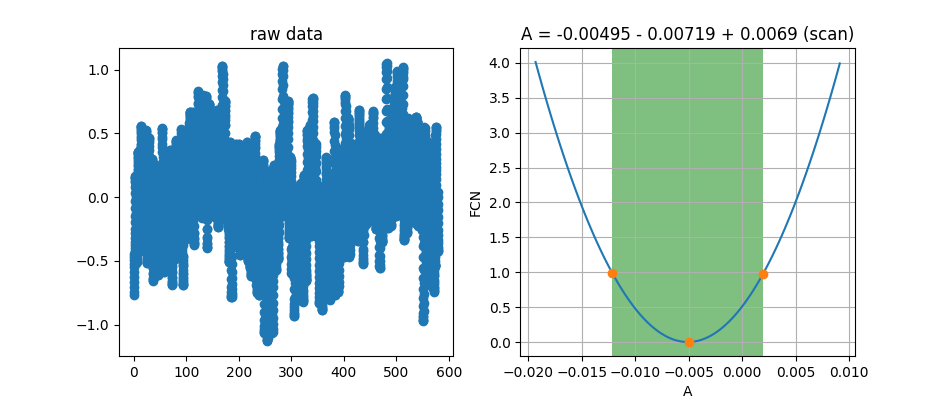

reduced chi2:  1.0002571037563295


In [45]:
freq = 0.5
fit_kwargs = {'A': 0, 'f': freq, 'phi': np.pi,
              'error_A': 0.01, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [0, 2 * np.pi], 'limit_A': [-1,1],
              'print_level': 0, 'fix_f': True, 'fix_phi': False}

empirical_rms = np.std(envelope3_avg)
m1 = lc_i.find_mle_sin(envelope3_avg, fsamp=10, noise_rms=empirical_rms, plot=True, suppress_print=False, **fit_kwargs)

In [46]:
delta_alpha = m1.values[0]/average
print('sensitivity: ', '{:.2e}'.format(np.abs(delta_alpha)))

sensitivity:  6.75e-05


In [100]:
foldername = r'/data/new_trap/20191107/Bead1/DMdata/'
bdf_DMdata_7 = load_dir(foldername)

200  files in folder
200  files loaded


In [8]:
foldername = r'/data/new_trap/20191107/Bead1/DMdata2/'
bdf_DMdata2_7 = load_dir(foldername)[6:36]

85  files in folder
85  files loaded


<IPython.core.display.Javascript object>


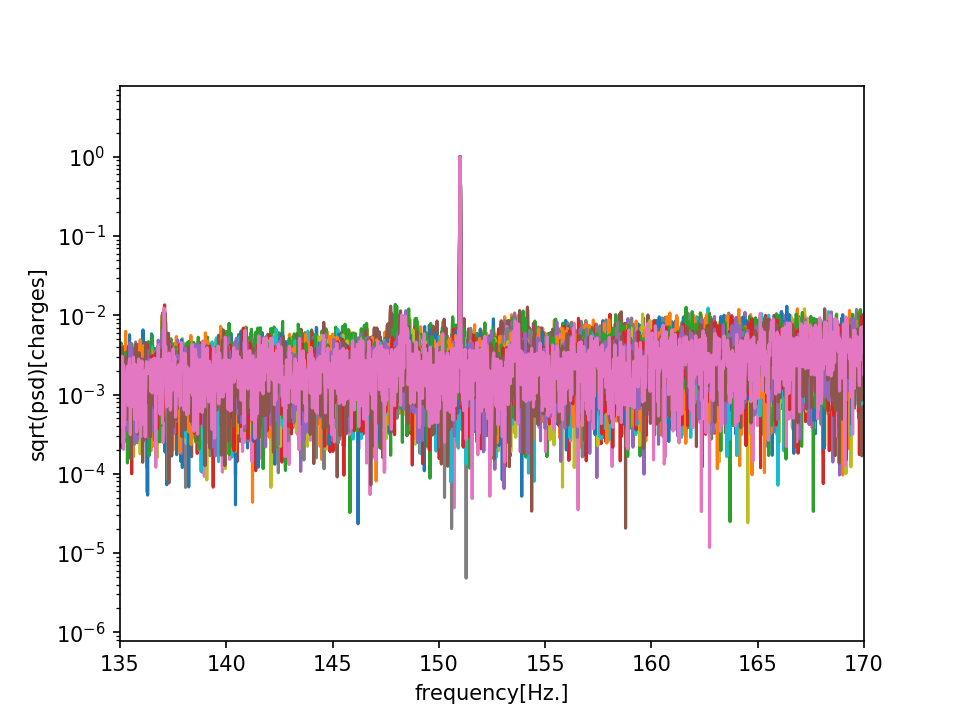

[Text(0, 0.5, 'sqrt(psd)[charges]'),
 (135, 170),
 Text(0.5, 0, 'frequency[Hz.]')]

In [19]:
_,ax = plt.subplots()
for bb in BDFs:
#     fft, freq = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=300000)
    fft3, freq3 = matplotlib.mlab.psd(bb.y2,Fs=5000, detrend='linear', NFFT=300000)
#     fft_c, freq = matplotlib.mlab.csd(bb.x2, bb.x3,Fs=5000, detrend='linear', NFFT=300000)
#     fft /= fft[freq==151]
#     fft_c /= fft_c[freq==151]
    fft3 /= fft3[freq==151]
#     ax.semilogy(freq, np.sqrt(fft))
    ax.semilogy(freq, np.sqrt(fft3))
# ax[0].set(xlim=(100,200))
ax.set(xlim=(135,170), xlabel='frequency[Hz.]', ylabel='sqrt(psd)[charges]')

In [27]:
foldername = r'/home/data_transfer/data_from_windows/20191114/Bead1/DMadata_X_2/'
BDFs = load_dir(foldername)

35  files in folder
35  files loaded


<IPython.core.display.Javascript object>


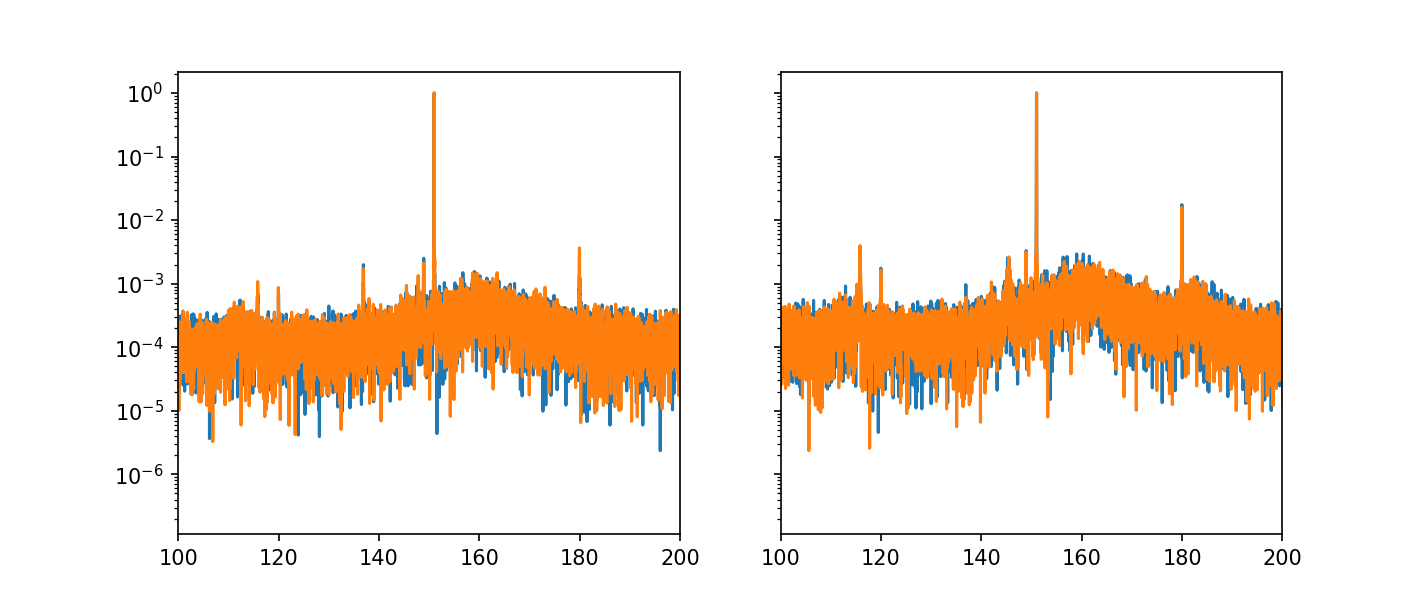

[(100, 200)]

In [29]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True, sharex=True)
for bb in BDFs[-2:]:
    fft, freq = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=300000)
    fft3, freq3 = matplotlib.mlab.psd(bb.x3,Fs=5000, detrend='linear', NFFT=300000)
    fft_c, freq = matplotlib.mlab.csd(bb.x2, bb.x3,Fs=5000, detrend='linear', NFFT=300000)
    fft /= fft[freq==151]
    fft_c /= fft_c[freq==151]
    fft3 /= fft3[freq==151]
    ax[0].semilogy(freq, np.sqrt(fft))
    ax[1].semilogy(freq, np.sqrt(fft3))
ax[0].set(xlim=(100,200))
ax[1].set(xlim=(100,200))

In [47]:
## fit all data
m1_all = []
t_sub = t[5000:-5000]
freq = 1
fit_kwargs = {'A': 0, 'f': freq, 'phi': np.pi,
              'error_A': 0.01, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [0, 2 * np.pi], 'limit_A': [-1,1],
              'print_level': 0, 'fix_f': True, 'fix_phi': False}

for i,bb in enumerate(bdf_DMdata2_7):
    xx3 = bb.response_at_freq3('x',151, bandwidth=10)/6
    analytic_signal3 = signal.hilbert(xx3)
    amplitude_envelope3 = np.abs(analytic_signal3)
    
    average = np.mean(amplitude_envelope3[5000:-5000])
    std = np.std(amplitude_envelope3[5000:-5000])
    envelope3_subtracted = amplitude_envelope3-average
    envelope3_subtracted = envelope3_subtracted[5000:-5000]
    
    empirical_rms = std
    m1_tmp = lc_i.find_mle_sin(envelope3_subtracted, fsamp=5000, noise_rms=empirical_rms, plot=False, suppress_print=False, **fit_kwargs)
    delta_alpha = m1_tmp.values[0]/average
    print(i, 'sensitivity: ', '{:.2e}'.format(np.abs(delta_alpha)))
    m1_all.append(m1_tmp)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Data overall time:  58.0  sec.
bandpass time:  7.152557373046875e-07
minimization time:  1.4960474967956543
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    | -1.51E-2  |  0.18E-2  |            |            |   -1    |    1    |       |
| 1 | f    |    1.0    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |   3.40    |   0.12    |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  0.999772950215925
0 sensitivity:  2.13e-04
Data overall time:  58.0  sec.
bandpass time:  1.1920928955078125e-06
minimization time:  1.622894287109375
-----------------------------------------------------------------------------------------

minimization time:  1.914271593093872
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |  2.46E-2  |  0.17E-2  |            |            |   -1    |    1    |       |
| 1 | f    |    1.0    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |   4.00    |   0.07    |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  0.9992921085698676
11 sensitivity:  3.12e-04
Data overall time:  58.0  sec.
bandpass time:  1.9073486328125e-06
minimization time:  1.6396584510803223
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit

minimization time:  2.508146047592163
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |  1.66E-2  |  0.11E-2  |            |            |   -1    |    1    |       |
| 1 | f    |    1.0    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |   3.59    |   0.07    |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  0.9991994545069426
22 sensitivity:  2.36e-04
Data overall time:  58.0  sec.
bandpass time:  6.9141387939453125e-06
minimization time:  3.0352365970611572
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Li

<IPython.core.display.Javascript object>


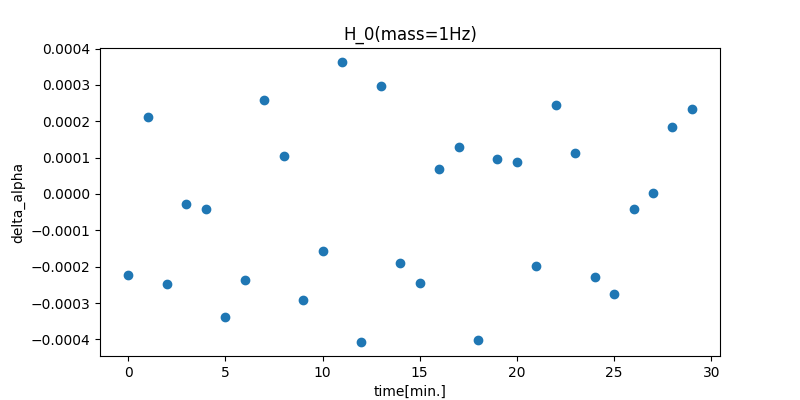

avergae:  -3.839817165434319e-05 std:  0.0002225373051407464
standard error:  4.062956730399906e-05


[Text(0, 0.5, 'delta_alpha'),
 Text(0.5, 0, 'time[min.]'),
 Text(0.5, 1.0, 'H_0(mass=1Hz)')]

In [53]:
_,ax = plt.subplots(figsize=(8,4))
all_vals = [m_.values[0]/average for m_ in m1_all]
all_errors = np.array([m_.errors[0]/average for m_ in m1_all])/1000
ax.errorbar(range(30), all_vals, all_errors, fmt='o')
print('avergae: ', np.mean(all_vals), 'std: ', np.std(all_vals))
print('standard error: ', np.std(all_vals)/np.sqrt(len(all_vals)))
ax.set(ylabel='delta_alpha', xlabel='time[min.]', title='H_0(mass=1Hz)')
# ax.errorbar(range(30), m1_avg, m1_std, fmt='o')

In [54]:
delta_alpha

0.00023263105704570937

In [55]:
## fit all data - x2 and x3
m2_all = []
t_sub = t[5000:-5000]
freq = 1

for i,bb in enumerate(bdf_DMdata2_7):
    xx3 = bb.response_at_freq3('x',151, bandwidth=10)/6
    analytic_signal3 = signal.hilbert(xx3)
    amplitude_envelope3 = np.abs(analytic_signal3)
    average3 = np.mean(amplitude_envelope3[5000:-5000])
    std3 = np.std(amplitude_envelope3[5000:-5000])
    envelope3_subtracted = amplitude_envelope3-average3
    envelope3_subtracted = envelope3_subtracted[5000:-5000]
    
    xx2 = bb.response_at_freq2('x',151, bandwidth=10)*50000
    analytic_signal2 = signal.hilbert(xx2)
    amplitude_envelope2 = np.abs(analytic_signal2)
    average2 = np.mean(amplitude_envelope2[5000:-5000])
    std2 = np.std(amplitude_envelope2[5000:-5000])
    envelope2_subtracted = amplitude_envelope2-average2
    envelope2_subtracted = envelope2_subtracted[5000:-5000]
    
    fit_kwargs = {'A': 0, 'f': freq, 'phi': 0, 'A2': average2/average3, 'f2': freq, 'delta_phi': 0,
              'error_A': 0.01, 'error_f': 1, 'error_phi': 0.1, 'errordef': 1,
              'error_A2': 2, 'error_f2': 10, 'error_delta_phi': 0.1,
              'limit_phi': [0, 2 * np.pi],'limit_delta_phi': [-0.1, 0.1],
              'limit_A': [-1,1], #'limit_A2': [1.8,2.2],
              'print_level': 0, 'fix_f': True, 'fix_phi': False, 'fix_f2': True, 'fix_delta_phi': True, 'fix_A2': True}

    empirical_rms = 1
    m1_tmp = lc_i.find_mle_2sin(envelope3_subtracted, envelope2_subtracted, fsamp=5000, noise_rms=std3, noise_rms2=std2,
                                plot=False, suppress_print=False, **fit_kwargs)
    delta_alpha = m1_tmp.values[0]/average3
    print(i, 'sensitivity: ', '{:.2e}'.format(np.abs(delta_alpha)))
    m2_all.append(m1_tmp)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Data overall time:  58.0  sec.
bandpass time:  1.2159347534179688e-05
minimization time:  5.525085687637329
-----------------------------------------------------------------------------------------------
|   | Name      |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------------------------
| 0 | A         |  1.40E-2  |  0.18E-2  |            |            |   -1    |    1    |       |
| 1 | A2        |    1.4    |    2.0    |            |            |         |         |  yes  |
| 2 | f         |    1.0    |    1.0    |            |            |         |         |  yes  |
| 3 | f2        |    1.0    |   10.0    |            |            |         |         |  yes  |
| 4 | phi       |   0.25    |   0.13    |            |            |    0    | 6.28319 |       |
| 5 | delta_phi |   0.00    |   0.10    |            |            |  -0.1   |   0.1   |  yes  |
----------------------------

minimization time:  6.105882406234741
-----------------------------------------------------------------------------------------------
|   | Name      |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------------------------
| 0 | A         | -0.88E-2  |  0.17E-2  |            |            |   -1    |    1    |       |
| 1 | A2        |    2.4    |    2.0    |            |            |         |         |  yes  |
| 2 | f         |    1.0    |    1.0    |            |            |         |         |  yes  |
| 3 | f2        |    1.0    |   10.0    |            |            |         |         |  yes  |
| 4 | phi       |   1.43    |   0.20    |            |            |    0    | 6.28319 |       |
| 5 | delta_phi |   0.00    |   0.10    |            |            |  -0.1   |   0.1   |  yes  |
-----------------------------------------------------------------------------------------------
re

minimization time:  6.784939765930176
-----------------------------------------------------------------------------------------------
|   | Name      |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------------------------
| 0 | A         | -0.32E-2  |  0.15E-2  |            |            |   -1    |    1    |       |
| 1 | A2        |    2.1    |    2.0    |            |            |         |         |  yes  |
| 2 | f         |    1.0    |    1.0    |            |            |         |         |  yes  |
| 3 | f2        |    1.0    |   10.0    |            |            |         |         |  yes  |
| 4 | phi       |    1.0    |    0.5    |            |            |    0    | 6.28319 |       |
| 5 | delta_phi |   0.00    |   0.10    |            |            |  -0.1   |   0.1   |  yes  |
-----------------------------------------------------------------------------------------------
re

minimization time:  5.267613887786865
-----------------------------------------------------------------------------------------------
|   | Name      |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------------------------
| 0 | A         |  1.51E-2  |  0.13E-2  |            |            |   -1    |    1    |       |
| 1 | A2        |    0.9    |    2.0    |            |            |         |         |  yes  |
| 2 | f         |    1.0    |    1.0    |            |            |         |         |  yes  |
| 3 | f2        |    1.0    |   10.0    |            |            |         |         |  yes  |
| 4 | phi       |   1.38    |   0.09    |            |            |    0    | 6.28319 |       |
| 5 | delta_phi |   0.00    |   0.10    |            |            |  -0.1   |   0.1   |  yes  |
-----------------------------------------------------------------------------------------------
re

<IPython.core.display.Javascript object>


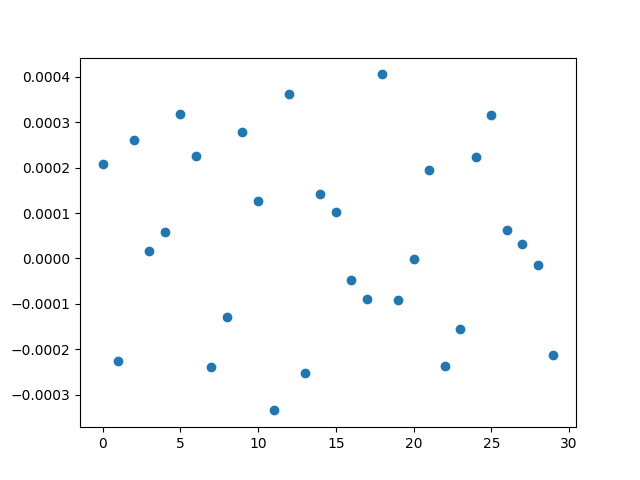

avergae:  4.325902091081662e-05 std:  0.0002054982843354108
standard error:  3.751868195303834e-05


In [58]:
_,ax = plt.subplots()
all_vals = [m_.values[0]/average3 for m_ in m2_all]
all_errors = np.array([m_.errors[0]/average for m_ in m2_all])/1000
ax.errorbar(range(30), all_vals, all_errors, fmt='o')
print('avergae: ', np.mean(all_vals), 'std: ', np.std(all_vals))
print('standard error: ', np.std(all_vals)/np.sqrt(len(all_vals)))

<IPython.core.display.Javascript object>


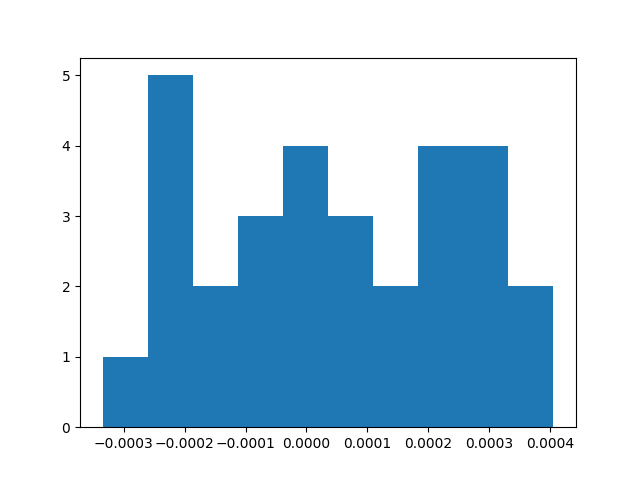

(array([1., 5., 2., 3., 4., 3., 2., 4., 4., 2.]),
 array([-3.34658973e-04, -2.60671034e-04, -1.86683094e-04, -1.12695155e-04,
        -3.87072150e-05,  3.52807245e-05,  1.09268664e-04,  1.83256604e-04,
         2.57244543e-04,  3.31232483e-04,  4.05220422e-04]),
 <a list of 10 Patch objects>)

In [63]:
_,ax = plt.subplots()
ax.hist(all_vals)